In [1]:
from IPython.core.display import display, HTML
display(HTML\
        ("<style>.container { \
        width:100% !important; \
        }</style>"))
display(HTML\
        ("<style>.input_prompt{ \
        min-width: 1ex; \
        }</style>"))

In [2]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# import matplotlib as mpl
# mpl.use('Agg')

import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
path = 'Grupo_Fleury_Dataset_Covid19_Resultados_Exames/'

In [4]:
einstein_exames = pd.read_csv(path+'Grupo_Fleury_Dataset_Covid19_Resultados_Exames.csv',delimiter='|', error_bad_lines=False, encoding="latin")
einstein_paciente = pd.read_csv(path+'Grupo_Fleury_Dataset_Covid19_Pacientes.csv',delimiter='|', error_bad_lines=False, encoding="latin")

In [6]:
einstein_exames.columns = ['id_paciente', 'dt_coleta', 'de_origem', 'de_exame', 'de_analito', 'de_resultado', 'cd_unidade', 'de_valor_referencia']

In [9]:
einstein_exames['dt_coleta'] =pd.to_datetime(einstein_exames['dt_coleta'], format="%d/%m/%Y")

In [10]:
einstein_exames = einstein_exames.sort_values(['dt_coleta'])

In [11]:
print(einstein_exames.head().iloc[0]['dt_coleta'], einstein_exames.tail().iloc[4]['dt_coleta'] )

2019-11-01 00:00:00 2020-06-15 00:00:00


In [5]:
einstein_exames.columns = ['id_paciente', 'dt_coleta', 'de_origem', 'de_exame', 'de_analito', 'de_resultado', 'cd_unidade', 'de_valor_referencia']
einstein_exames.head()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
0,1AD07C7A1E4D80B608DD7A650766CCF0,19/03/2020,LAB,"NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO P...","Covid 19, Detecção por PCR",NÃO DETECTADO,NaN,Não detectado
1,1AD07C7A1E4D80B608DD7A650766CCF0,19/03/2020,LAB,"NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO P...","Covid 19, Material",raspado de nasofaringe,NaN,NaN
2,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Hemoglobina,"15,2",g/dL,"13,5 a 17,5"
3,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",VCM,"89,2",fL,"81,0 a 95,0"
4,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Leucócitos,5940,/mm3,3.500 a 10.500


In [6]:
einstein_exames.describe()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
count,2496591,2496591,2496591,2496591,2496591,2496591,1854728,1940705
unique,129595,226,1,722,978,14822,55,856
top,FD10C24CA5986B00FFDDED743447EC81,10/06/2020,LAB,"HEMOGRAMA, sangue total","Covid 19, Anticorpos IgG, Quimiolumin.-Índice",NÃO REAGENTE,mg/dL,Não reagente
freq,908,49266,2496591,785838,85009,160652,360842,204654


In [7]:
einstein_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496591 entries, 0 to 2496590
Data columns (total 8 columns):
id_paciente            object
dt_coleta              object
de_origem              object
de_exame               object
de_analito             object
de_resultado           object
cd_unidade             object
de_valor_referencia    object
dtypes: object(8)
memory usage: 152.4+ MB


In [8]:
einstein_paciente.columns = ['id_paciente', 'ic_sexo', 'aa_nascimento', 'cd_pais', 'cd_uf', 'cd_municipio', 'cd_cep']
einstein_paciente.describe()

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
count,129596,129596,129596,129596,129596,129596,129596
unique,129596,2,91,1,26,62,263
top,14A277F45CFA7A927AD7C9FC503F975C,F,1982,Brasil,SP,SAO PAULO,CCCC
freq,1,73417,3981,129596,92819,54307,106423


In [9]:
einstein_paciente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129596 entries, 0 to 129595
Data columns (total 7 columns):
id_paciente      129596 non-null object
ic_sexo          129596 non-null object
aa_nascimento    129596 non-null object
cd_pais          129596 non-null object
cd_uf            129596 non-null object
cd_municipio     129596 non-null object
cd_cep           129596 non-null object
dtypes: object(7)
memory usage: 6.9+ MB


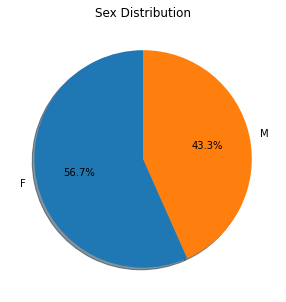

In [10]:
fig = plt.figure(figsize=[20,5])
s = einstein_paciente['ic_sexo'].value_counts().sort_index()
plt.pie( s.get_values(), labels=s.index, autopct='%1.1f%%',shadow=True, startangle=90 )
plt.title('Sex Distribution')
plt.show()

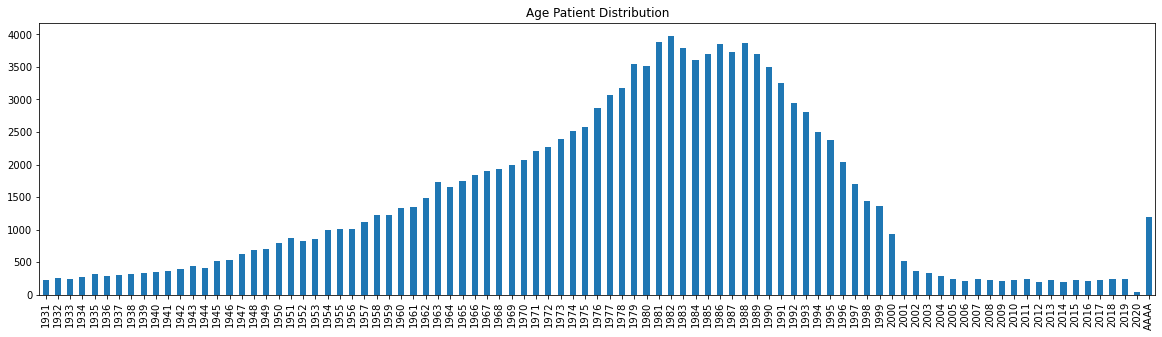

In [11]:
fig = plt.figure(figsize=[20,5])
s = einstein_paciente['aa_nascimento'].value_counts().sort_index()
s.plot.bar()
plt.title('Age Patient Distribution')
plt.show()

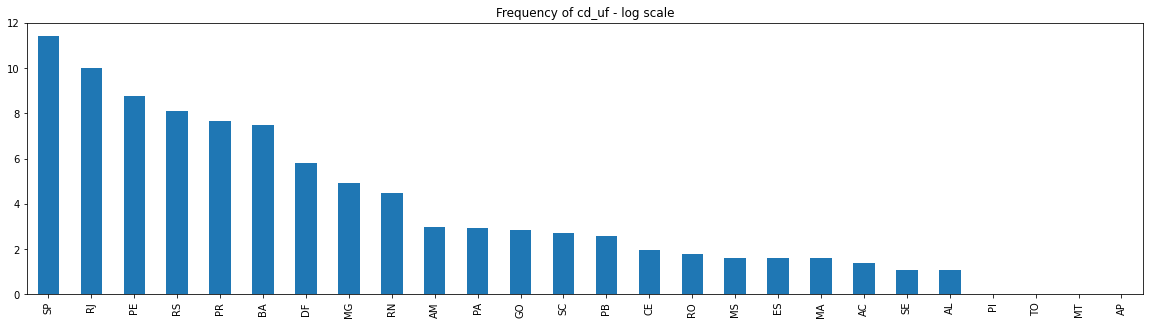

In [12]:
fig = plt.figure(figsize=[20,5])
s = np.log(einstein_paciente['cd_uf'].value_counts())
s.plot.bar()
plt.title('Frequency of cd_uf - log scale')
plt.xticks(rotation=90)
plt.show()

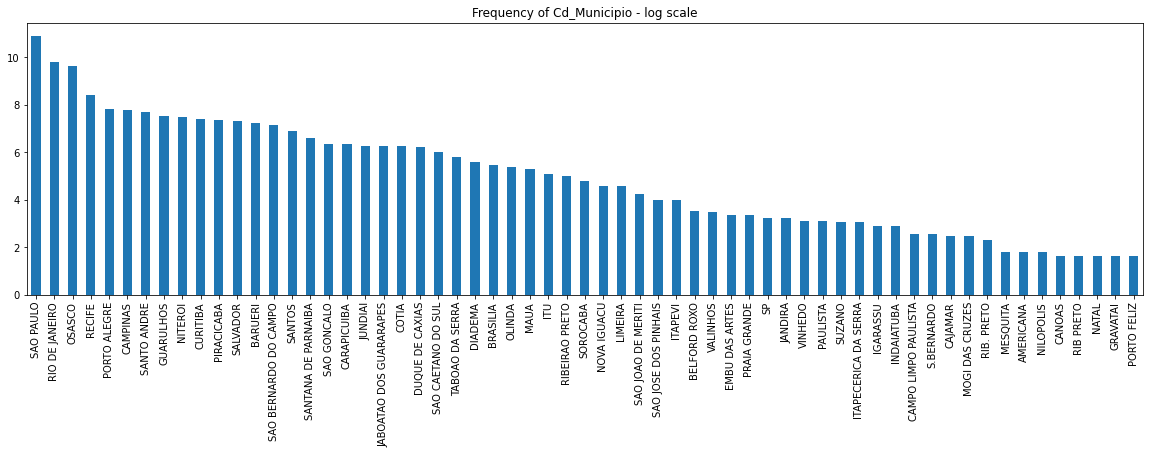

In [13]:
fig = plt.figure(figsize=[20,5])
s = np.log(einstein_paciente[einstein_paciente['cd_municipio'] != "MMMM"]['cd_municipio'].value_counts())
s.plot.bar()
plt.title('Frequency of Cd_Municipio - log scale')
plt.xticks(rotation=90)
plt.show()

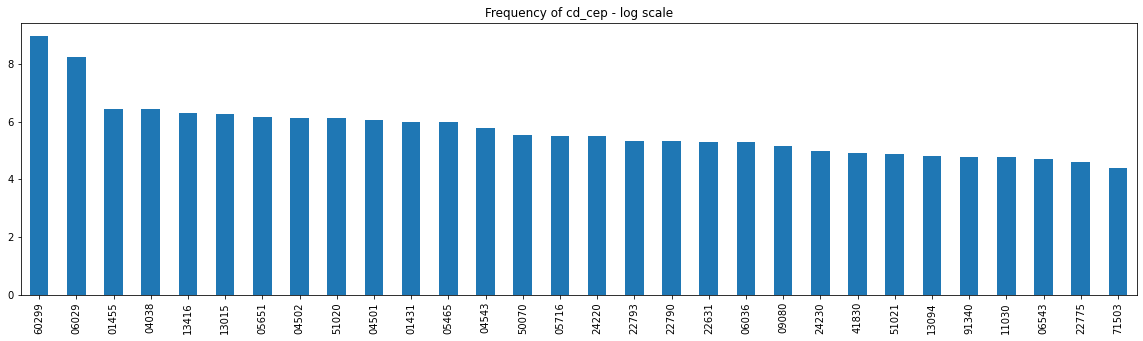

In [14]:
fig = plt.figure(figsize=[20,5])
s = np.log(einstein_paciente[einstein_paciente['cd_cep'] != "CCCC"]['cd_cep'].value_counts())[0:30]
s.plot.bar()
plt.title('Frequency of cd_cep - log scale')
plt.xticks(rotation=90)
plt.show()

In [15]:
cep = pd.read_csv('ceps.txt', delimiter=';', error_bad_lines=False, encoding="utf-8", dtype = {"cep" : "str"})

b'Skipping line 512331: expected 5 fields, saw 7\n'


In [16]:
cep_sp = cep[ cep['estado'].str[::-1].str[0:2] == 'PS' ]
cep_sp.head()

,cep,estado,cidade,endereco,extensao
0,01001000,São Paulo/SP,Sé,Praça da Sé - lado ímpar,NaN
1,01001001,São Paulo/SP,Sé,Praça da Sé - lado par,NaN
2,01001010,São Paulo/SP,Sé,Rua Filipe de Oliveira,NaN
3,01001900,São Paulo/SP,Sé,"Praça da Sé, 108",UNESP - Universidade Estadual Júlio de Mesqui...
4,01001901,São Paulo/SP,Sé,"Praça da Sé, 371",Edifício Santa Lídia


In [17]:
cep_sp[cep_sp['cep'].astype('str').str.contains('03019')].head()

,cep,estado,cidade,endereco,extensao
13127,03019000,São Paulo/SP,Brás,Rua Joaquim Carlos,NaN
13128,03019005,São Paulo/SP,Brás,Viela Adriano Ruiz,NaN
13129,03019007,São Paulo/SP,Brás,Vila Califórnia,NaN
13130,03019010,São Paulo/SP,Brás,Rua Júlio César da Silva,NaN
13131,03019020,São Paulo/SP,Brás,Rua José Kauer,NaN


In [18]:
cep_to_search= einstein_paciente[einstein_paciente['cd_cep'] != "CCCC"]['cd_cep'].value_counts().index
cep_to_search

Index(['60299', '06029', '01455', '04038', '13416', '13015', '05651', '04502',
       '51020', '04501',
       ...
       '04127', '22470', '05089', '04514', '05717', '06020', '14060', '07074',
       '13280', '90450'],
      dtype='object', length=262)

In [19]:
# cidades = []
# for cep_cid in cep_to_search:
#     cid = cep_sp[cep_sp['cep'].astype('str').str.contains(str(cep_cid))]
#     print(cid['cidade'].iloc[0], end = ', ')

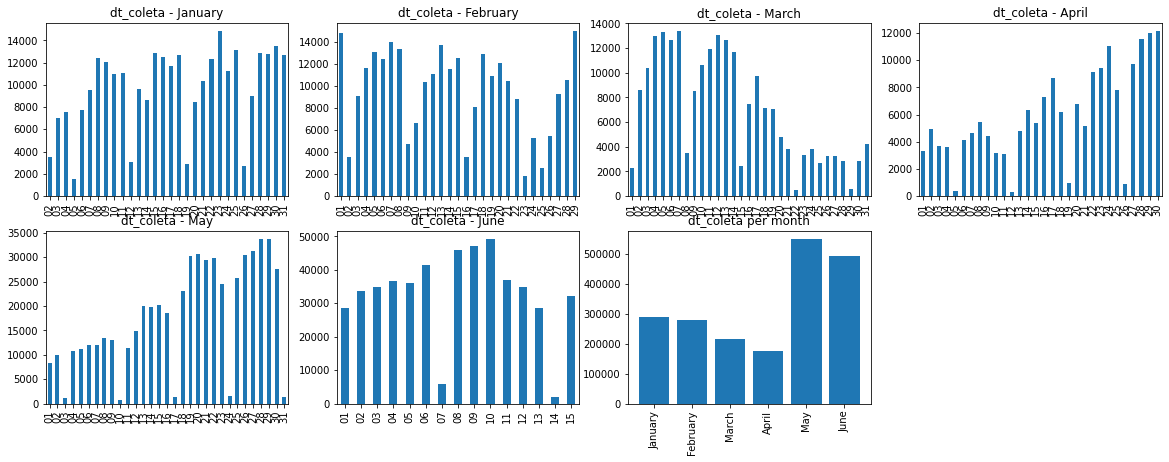

In [20]:
fig = plt.figure(figsize=[20,7])
months = ['January', 'February', 'March', 'April','May','June']
total = []
for i in range(len(months)):
    plt.subplot(2,4,i+1)
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]['dt_coleta'].value_counts().sort_index()
    total.append(np.sum(s))
    s.plot.bar()
    idx = list(range(0,len(s.index)))
    plt.xticks(idx, s.index.str[0:2])
    plt.title('dt_coleta - ' + months[i])
    plt.xticks(rotation=90)
# plt.show()

plt.subplot(2,4,7)
idx = list(range(1,len(months)+1))
plt.bar(idx,total)
plt.xticks(idx, months)
plt.title('dt_coleta per month')
plt.xticks(rotation=90)
plt.show()


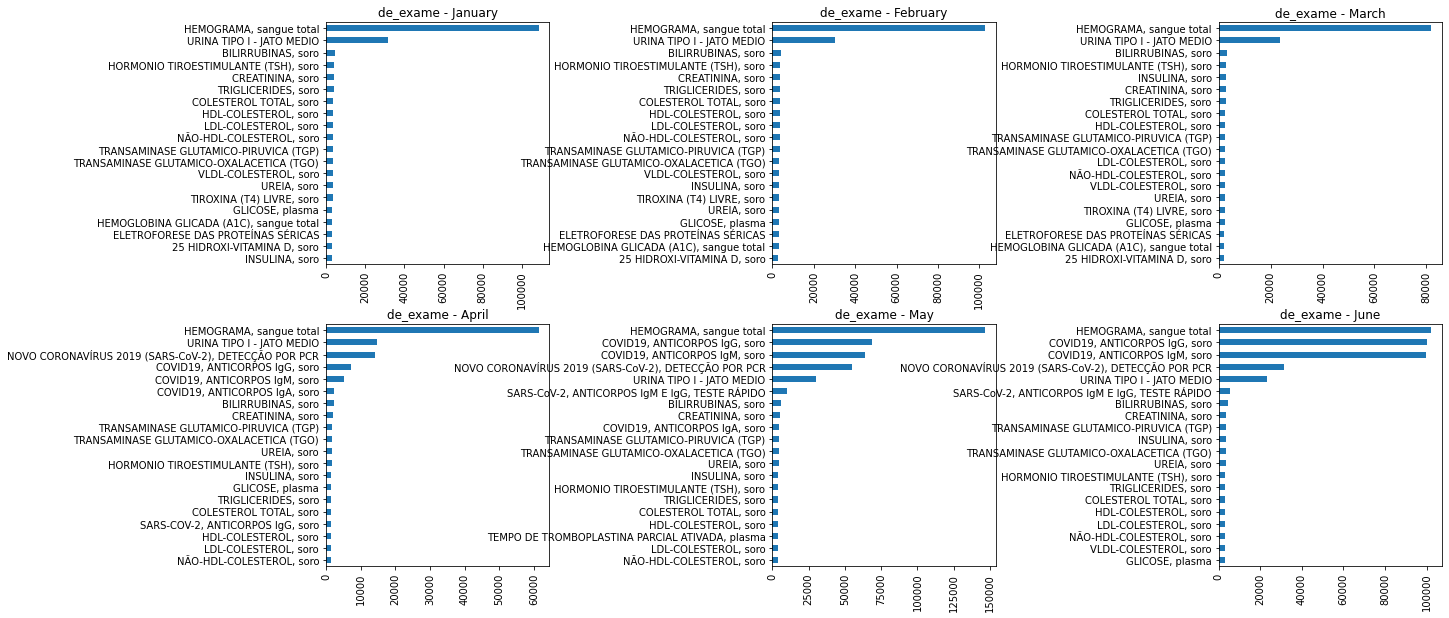

In [21]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=[20,10])
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=1.0, hspace=0.25)

# fig = plt.figure(figsize=[30,10])
months = ['January', 'February', 'March', 'April', 'May', 'June']
total = []
for i in range(len(months)):
#     plt.subplot(2,3,i+1)
    plt.subplot(gs1[i])
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]['de_exame'].value_counts()[0:20].sort_values(ascending=True)
    total.append(np.sum(s))
    s.plot.barh()
#     idx = list(range(1,len(s.index)+1))
#     plt.xticks(idx, s.index)
    plt.title('de_exame - ' + months[i])
    plt.xticks(rotation=90)

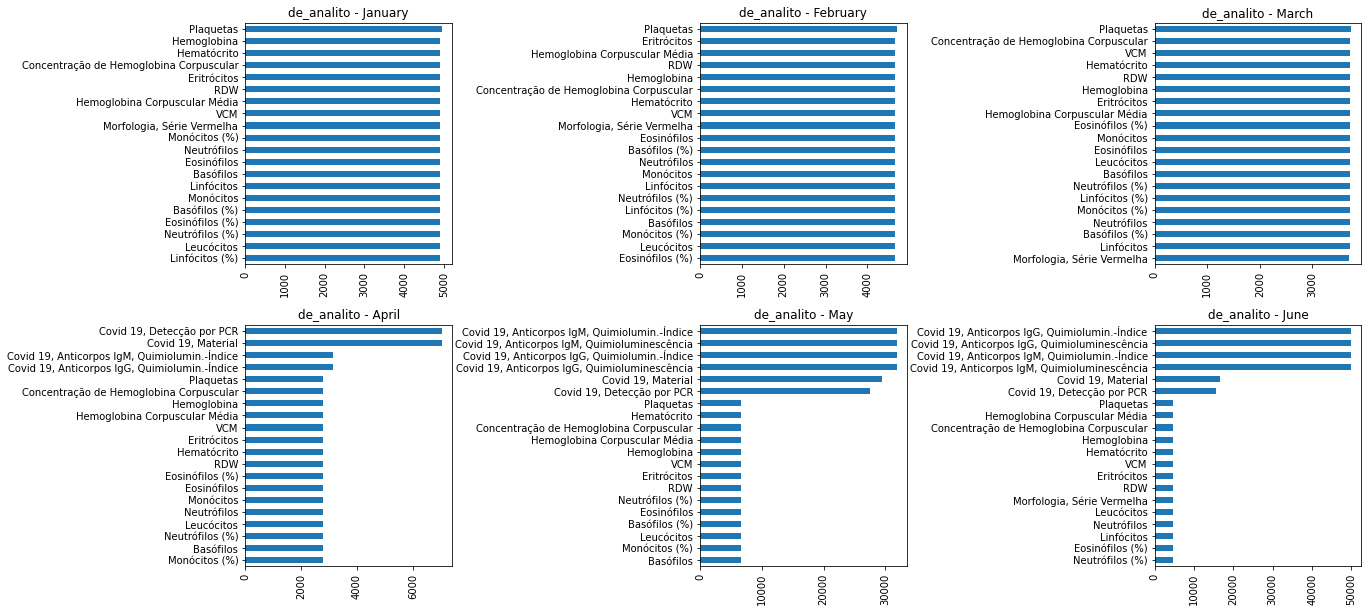

In [22]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=[20,10])
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=1.20, hspace=0.25)

# fig = plt.figure(figsize=[30,10])
months = ['January', 'February', 'March', 'April', 'May', 'June']
total = []
for i in range(len(months)):
#     plt.subplot(2,3,i+1)
    plt.subplot(gs1[i])
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]['de_analito'].value_counts()[0:20].sort_values(ascending=True)
    total.append(np.sum(s))
    s.plot.barh()
#     idx = list(range(1,len(s.index)+1))
#     plt.xticks(idx, s.index)
    plt.title('de_analito - ' + months[i])
    plt.xticks(rotation=90)

In [23]:
analito_resultado = einstein_exames

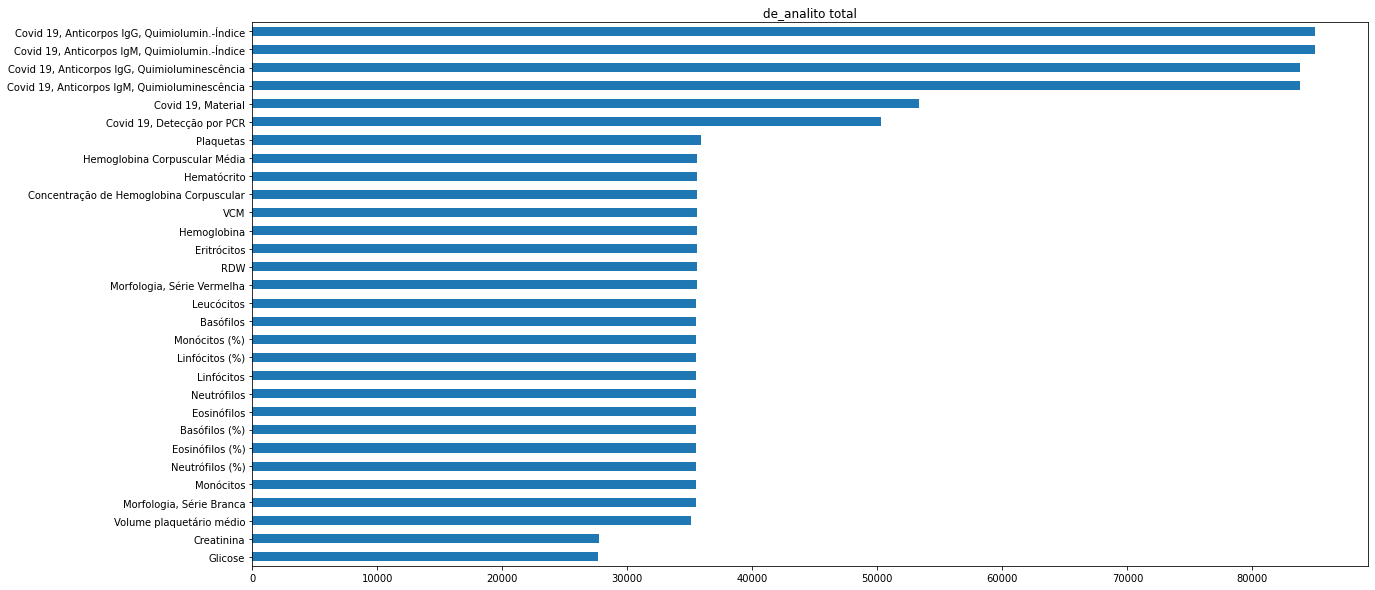

In [24]:
fig = plt.figure(figsize=[20,10])
s = analito_resultado['de_analito'].value_counts()[0:30].sort_values(ascending=True)
analitos_names = s.index
# print(s)
s.plot.barh()
plt.title('de_analito total')
plt.show()

In [25]:
an_res_num = analito_resultado[analito_resultado['de_resultado'].str.contains('[0-9]+.[0-9]+')]
# an_res_num['de_resultado'] = an_res_num['de_resultado'].astype('float')
an_res_num['de_resultado'] = an_res_num['de_resultado'].str.replace(',','.')
an_res_num['de_resultado'] = pd.to_numeric(an_res_num['de_resultado'],errors='coerce')

In [26]:
an_res_num

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
2,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Hemoglobina,15.200,g/dL,"13,5 a 17,5"
3,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",VCM,89.200,fL,"81,0 a 95,0"
4,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Leucócitos,5940.000,/mm3,3.500 a 10.500
5,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Neutrófilos,3220.000,/mm3,1.700 a 7.000
6,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Eosinófilos,370.000,/mm3,50 a 500
8,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Linfócitos,1730.000,/mm3,900 a 2.900
9,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Monócitos,560.000,/mm3,300 a 900
10,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Plaquetas,214000.000,/mm3,150.000 a 450.000
11,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Eritrócitos,4.890,milhões/mm3,"4,30 a 5,70"
12,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Hematócrito,43.600,%,"39,0 a 50,0"


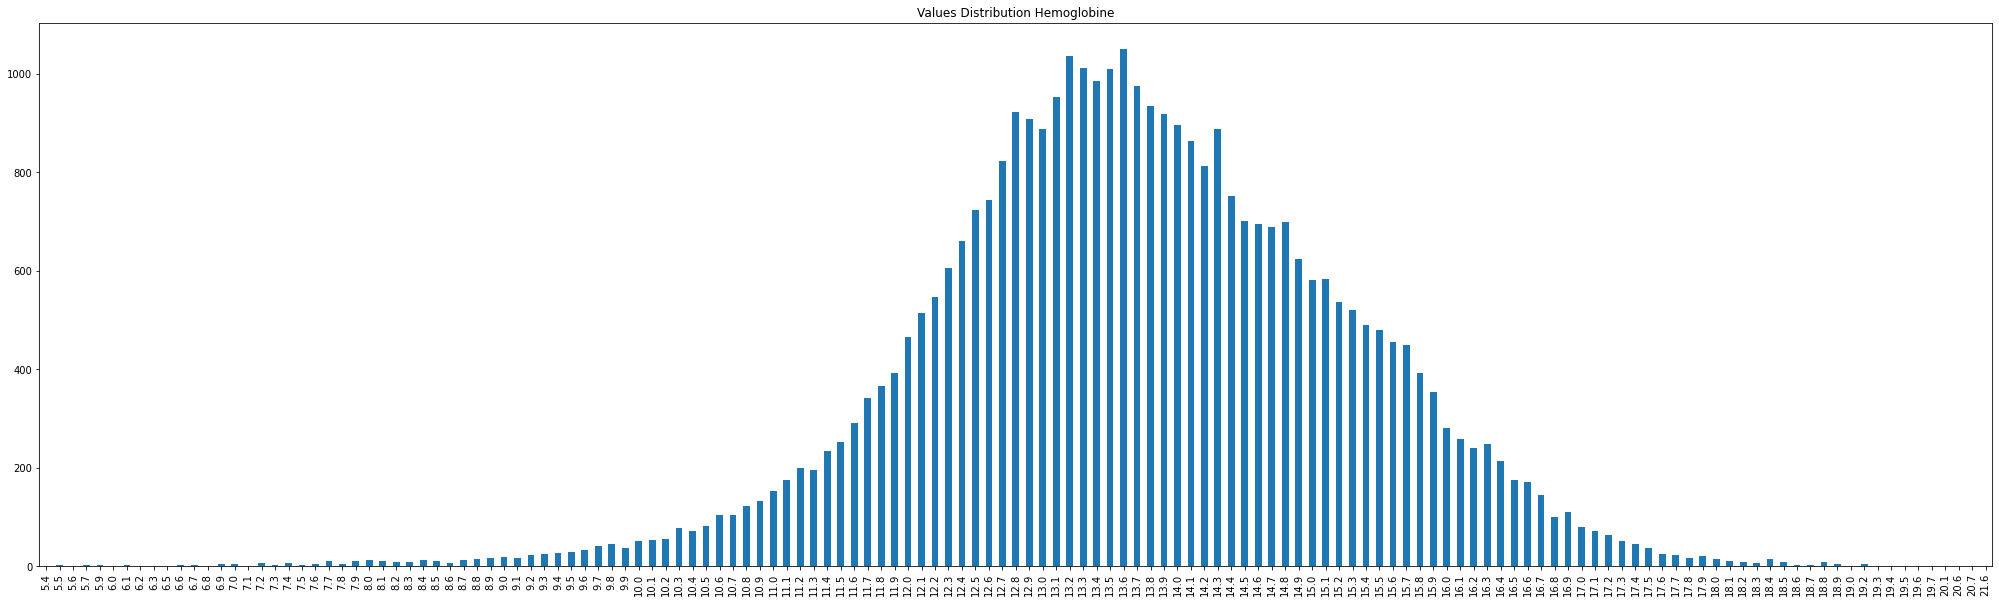

In [27]:
fig = plt.figure(figsize=[35,10])
s = an_res_num[ an_res_num['de_analito'].str[:] == 'Hemoglobina']
# print(s)
s = s[ s['de_resultado'] != np.nan ]['de_resultado'].value_counts().sort_index(ascending=True)
# print(s[0:200])
s.plot.bar()
plt.title('Values Distribution Hemoglobine')
plt.show()

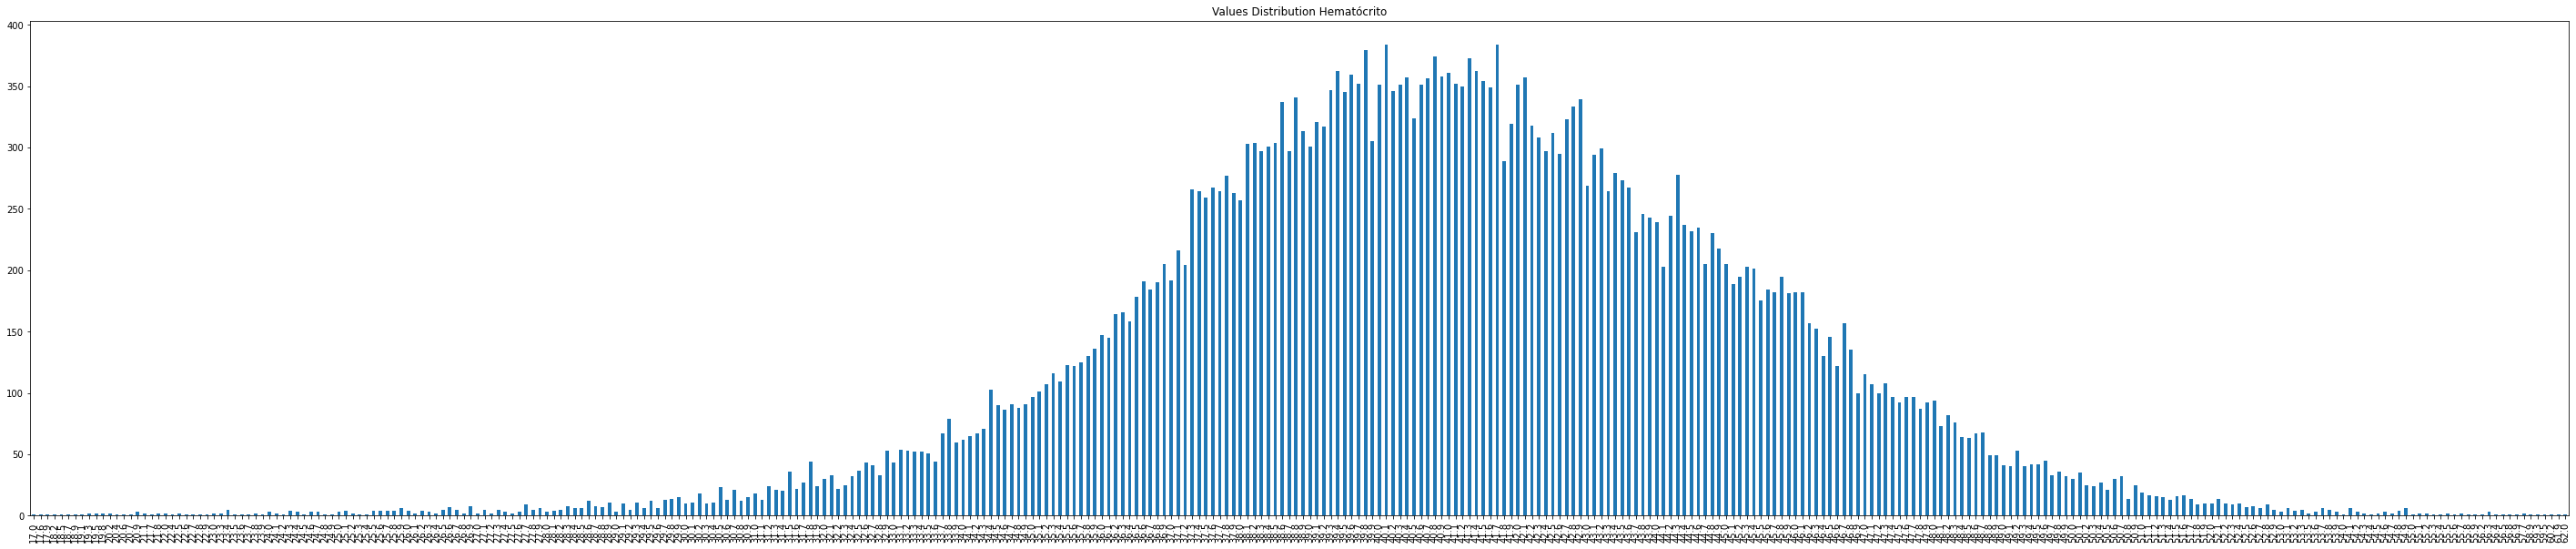

In [28]:
fig = plt.figure(figsize=[50,10])
s = an_res_num[ an_res_num['de_analito'].str[:] == 'Hematócrito']['de_resultado'].value_counts().sort_index(ascending=True)
# print(s.sort_index(ascending=False))
s.plot.bar()
plt.title('Values Distribution Hematócrito')
plt.show()

count    594.000000
mean      60.343434
std       79.031148
min        1.000000
25%        3.000000
50%       15.000000
75%      105.750000
max      253.000000
Name: de_resultado, dtype: float64


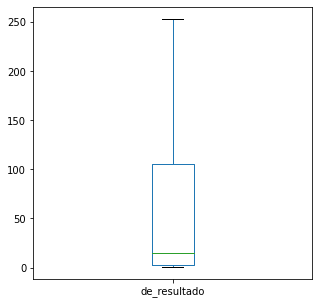

In [29]:
fig = plt.figure(figsize=[5,5])
s = an_res_num[ an_res_num['de_analito'].str[:] == 'Plaquetas']['de_resultado'].value_counts().sort_index(ascending=True)
print(s.describe())
# print(s)
# s.plot.bar()
s.plot.box()
# an_res_num[ an_res_num['de_analito'].str[:] == 'Plaquetas']['de_resultado'].describe()
# plt.title('Values Distribution Hematócrito')
# plt.show()

In [43]:
analito_resultado['de_analito'].value_counts()

Covid 19, Anticorpos IgG, Quimiolumin.-Índice    85009
Covid 19, Anticorpos IgM, Quimiolumin.-Índice    84997
Covid 19, Anticorpos IgG, Quimioluminescência    83781
Covid 19, Anticorpos IgM, Quimioluminescência    83766
Covid 19, Material                               53294
Covid 19, Detecção por PCR                       50260
Plaquetas                                        35897
Hemoglobina Corpuscular Média                    35586
Hematócrito                                      35586
Concentração de Hemoglobina Corpuscular          35586
VCM                                              35586
Hemoglobina                                      35586
Eritrócitos                                      35586
RDW                                              35581
Morfologia, Série Vermelha                       35553
Leucócitos                                       35532
Basófilos                                        35531
Monócitos (%)                                    35531
Linfócitos

In [46]:
analito_resultado_covid19 = analito_resultado[ analito_resultado['de_analito'].str.contains('Covid')]

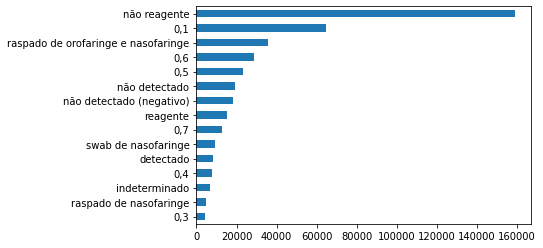

In [59]:
s = analito_resultado_covid19['de_resultado'].value_counts()[0:15].sort_values(ascending=True)
s.plot.barh()

In [50]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    return text    

round1 = lambda x: clean_text_round1(x)

In [51]:
analito_resultado_covid19['de_resultado'] = analito_resultado_covid19.de_resultado.apply(round1)

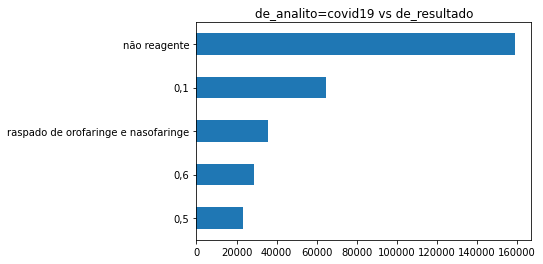

In [52]:
s = analito_resultado_covid19['de_resultado'].value_counts()[0:5].sort_values(ascending=True)
s.plot.barh()
plt.title('de_analito=covid19 vs de_resultado')
plt.show()

In [53]:
einstein_exames['de_resultado'] = einstein_exames.de_resultado.apply(round1)

In [54]:
def my_simple(s):
    otros = 0
    v = s.get_values()
    idx = 0
    for i in s.index:
        if i != 'detectado' and i != 'não detectado':
            otros += v[idx]
        idx += 1

    detectado = 0
    idx = 0
    for i in s.index:
        if i == 'detectado':
            detectado += v[idx]
        idx += 1

    ndetectado = 0
    idx = 0
    for i in s.index:
        if i == 'não detectado':
            ndetectado += v[idx]
        idx += 1
#     print(otros, detectado, ndetectado)
    results = pd.Series(dict( detectado= detectado , nao_detectado= ndetectado, outros=otros))
    return results

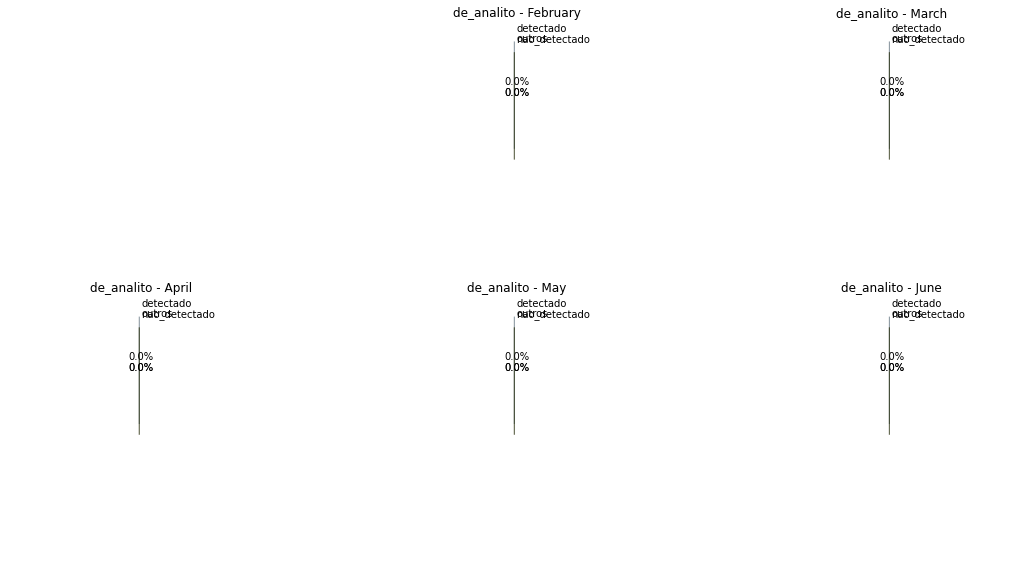

In [57]:
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

fig = plt.figure(figsize=[20,10])
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.025, hspace=0.025)

months = ['January', 'February', 'March', 'April','May', 'June']
total = []
colors = cm.rainbow(np.linspace(0, 1, 6))
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
for i in range(1,len(months)):
    plt.subplot(gs1[i])
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]
    s = s[ s['de_analito'].str[:] == 'Resultado COVID-19:' ]['de_resultado'].value_counts().sort_values(ascending=True)
    s = my_simple(s)
    plt.pie(list(s.get_values()), labels=list(s.index), autopct='%1.1f%%',shadow=True, startangle=90, explode=explode)#,colors=colors[0:len(list(s.get_values()))])
    plt.title('de_analito - ' + months[i])
    plt.xticks(rotation=90)

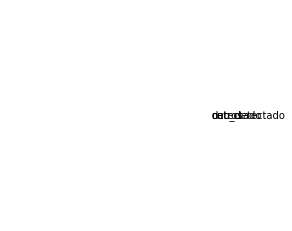

In [58]:
plt.pie(list(s.get_values()), labels=list(s.index))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)

In [ ]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s = an_res_num[ an_res_num['de_analito'].str[:] == names]['de_resultado'].value_counts().sort_index(ascending=True)
    if s.shape[0] != 0:
        plt.subplot(5,7,i+1)
        s.plot.box(title=names, vert=0)
        plt.gca().yaxis.set_visible(False)
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

In [60]:
covid19_negativo = analito_resultado_covid19[ analito_resultado_covid19['de_resultado'].str[:] == 'não detectado' ]
covid19_positivo = analito_resultado_covid19[ analito_resultado_covid19['de_resultado'].str[:] == 'detectado' ]
ids_negativo = covid19_negativo['id_paciente'].unique()
ids_positivo = covid19_positivo['id_paciente'].unique()

In [61]:
pacientes_negativo = []
for ids in ids_negativo:
    data_negativo = einstein_exames[ einstein_exames['id_paciente'].str[:] == str(ids) ]
    pacientes_negativo.append(data_negativo)

In [62]:
total_pacientes_negativo = pd.concat( pacientes_negativo )

In [63]:
pacientes_positivo = []
for ids in ids_positivo:
    data_positivo = einstein_exames[ einstein_exames['id_paciente'].str[:] == str(ids) ]
    pacientes_positivo.append(data_positivo)

In [64]:
total_pacientes_positivo = pd.concat( pacientes_positivo )

In [74]:
total_pacientes_positivo['de_resultado'] = total_pacientes_positivo['de_resultado'].str.replace(',','.')
total_pacientes_negativo['de_resultado'] = total_pacientes_negativo['de_resultado'].str.replace(',','.')

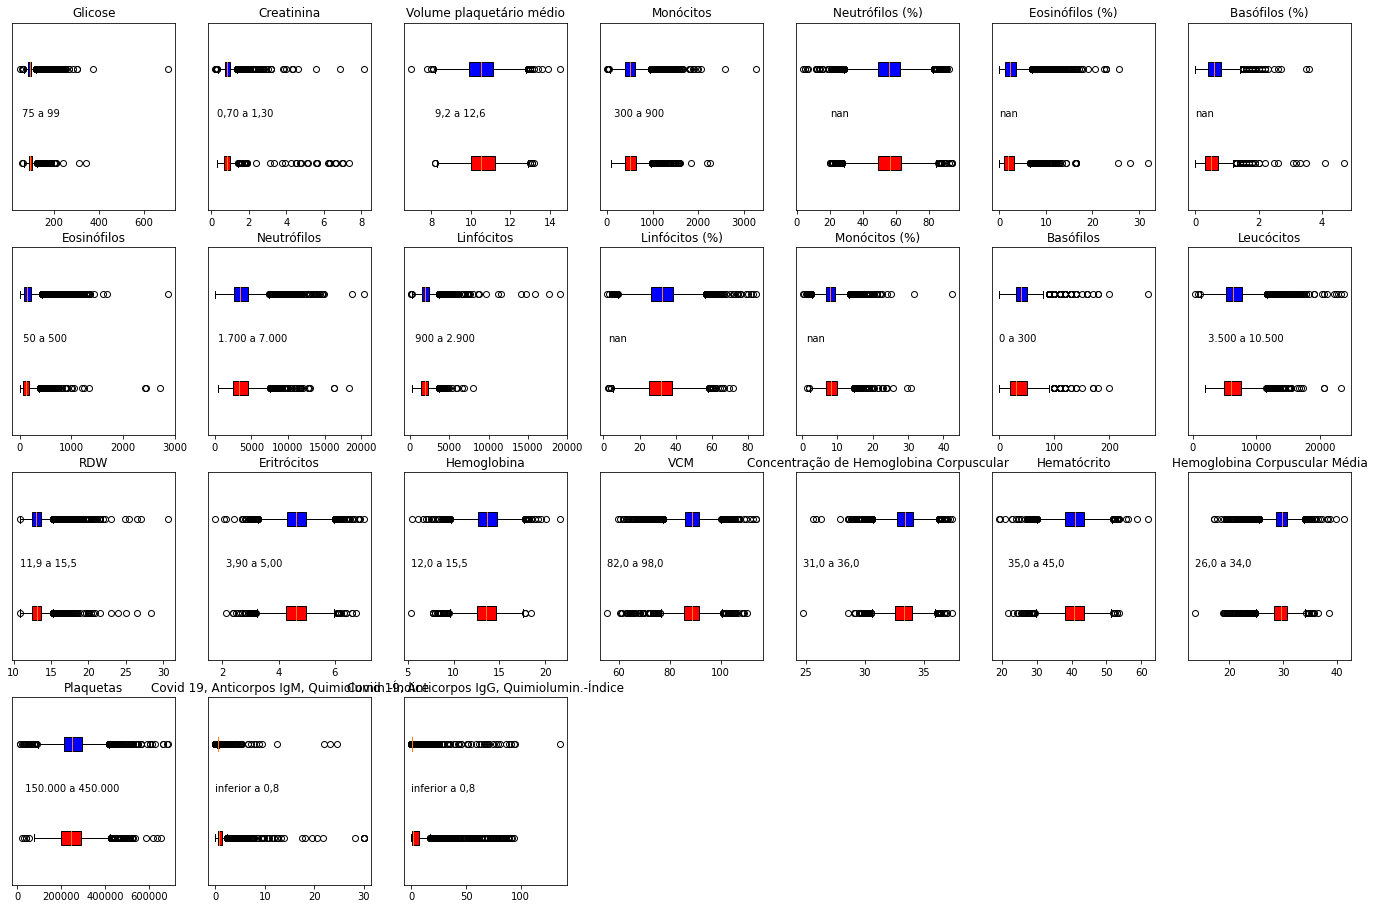

In [91]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s1 = total_pacientes_positivo[ total_pacientes_positivo['de_analito'].str[:] == names]['de_resultado']
    s2 = total_pacientes_negativo[ total_pacientes_negativo['de_analito'].str[:] == names]['de_resultado']
    
    s1 = pd.to_numeric(s1,errors='coerce')
    s1 = s1.get_values()
    s1 = s1.astype('float')
    s1 = s1[np.logical_not(np.isnan(s1))]
    
    s2 = pd.to_numeric(s2,errors='coerce')
    s2 = s2.get_values()
    s2 = s2.astype('float')
    s2 = s2[np.logical_not(np.isnan(s2))]
    
    if s1.shape[0] != 0 and names != 'Resultado COVID-19:':
        plt.subplot(5,7,i+1)
#         s1.plot.box(title=names, vert=0)
#         s2.plot.box(title=names, vert=0)
        values = [s1, s2]
        bplot = plt.boxplot(values, vert=0, patch_artist=True )
        
        # fill with colors
        colors = ['red', 'blue']
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        
        plt.title(names)
        plt.text(np.min(s1),1.5,total_pacientes_positivo[ total_pacientes_positivo['de_analito'].str[:] == names]['de_valor_referencia'].iloc[0])
        plt.gca().yaxis.set_visible(False)
#         plt.legend()
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

In [67]:
total_pacientes_positivo.to_csv('covid19_positivo_flury.csv', sep ="|", encoding='utf-8')
total_pacientes_negativo.to_csv('covid19_negativo_flury.csv', sep ="|", encoding='utf-8')

In [68]:
total_pacientes_negativo_ = pd.DataFrame.copy(total_pacientes_negativo)
total_pacientes_negativo_['dt_coleta'] = pd.to_datetime(total_pacientes_negativo_['dt_coleta'], format="%d/%m/%Y")
multi = total_pacientes_negativo_.set_index(['id_paciente','dt_coleta']).sort_index()
multi.to_csv('negativo_multi_index_flury.csv', sep ="|", encoding='utf-8')

In [69]:
total_pacientes_positivo_ = pd.DataFrame.copy(total_pacientes_positivo)
total_pacientes_positivo_['dt_coleta'] = pd.to_datetime(total_pacientes_positivo_['dt_coleta'], format="%d/%m/%Y")
multi = total_pacientes_positivo_.set_index(['id_paciente','dt_coleta']).sort_index()
multi.to_csv('positivo_multi_index_flury.csv', sep ="|", encoding='utf-8')

In [76]:
s2 = total_pacientes_negativo[ total_pacientes_negativo['de_analito'].str[:] == 'Morfologia, Série Vermelha']['de_resultado']

In [78]:
s2.str.replace(',','.').value_counts()

normais                                                                                                                                                                                                                                               5101
microcitose discreta                                                                                                                                                                                                                                    62
poiquilocitose discreta                                                                                                                                                                                                                                 46
microcitose discreta. poiquilocitose discreta                                                                                                                                                                                                          

In [82]:
np.char.isnumeric('12345')

array(True)